This notebook uses a deep learning image classification model, VGG16, to find similar images among a set of photos of household tools, cheese graters and foot files.

Below we import the libraries we'll be using.

In [ ]:
!pip install keras=='2.3.1'
from keras.models import Model
from keras.layers import Dense,Flatten
from keras.applications import vgg16
from keras import backend as K
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np 

We'll download the model VGG16 that has already been trained on the dataset ImageNet.

In [ ]:
model = vgg16.VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 34s 0us/step


Next, we'll remove the last two layers of the model.

In [ ]:
model2 = Model(model.input, model.layers[-2].output)

We'll download addtional images from GitHub below

In [ ]:
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/imgs/tools.zip
!unzip tools.zip

--2020-05-21 19:37:08--  https://github.com/mlittmancs/great_courses_ml/raw/master/imgs/tools.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/imgs/tools.zip [following]
--2020-05-21 19:37:09--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/imgs/tools.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2502460 (2.4M) [application/zip]
Saving to: ‘tools.zip’

tools.zip           100%[===================>]   2.39M  14.5MB/s    in 0.2s    

2020-05-21 19:37:09 (14.5 MB/s) - ‘tools.zip’ saved [2502460/2502460]

Archive:  tools.zip
replace cg01.

We will then load and process the images so that we can input them into our model and use the predictions from the model to find pairs of images that are most similar to each other according to our model.

In [ ]:
# get images
from PIL import Image
from IPython.display import display
         
dat = []
labs = []
imgs = []
imgflist = ["cg01", "cg02", "cg03", "cg04", "cg05", "cg06", "cg07", "cg08", "cg09", "cg10",
           "ff01", "ff02", "ff03", "ff04", "ff05", "ff06", "ff07", "ff08", "ff09", "ff10"]
for imgf in imgflist:
    img = image.load_img(imgf+".jpeg", target_size=(224,224))
    imgs.append(img)
    img_arr = np.expand_dims(image.img_to_array(img), axis=0)
    x = preprocess_input(img_arr)
    preds = model2.predict(x)
    dat.append(preds[0])
for i in range(len(dat)):
  i1 = dat[i]
  bestmatch, bestsim = -1, 0
  for j in range(len(dat)):
    i2 = dat[j]
    sim = i1 @ i2
    if sim > bestsim and i != j: bestmatch, bestsim = j, sim
  print(i,bestmatch)
  display(imgs[i], imgs[bestmatch])

Below are the number of images we have downloaded

In [ ]:
len(dat)

20

We will also do this by dividing the data into training and testing data, and for each image in the training set, find the image in the test set that is most similar.

pair 5


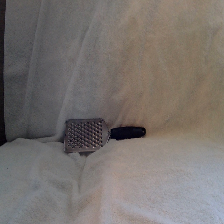

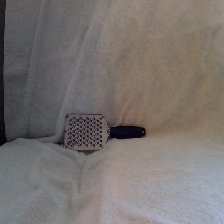

 
pair 6


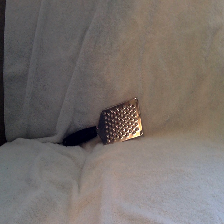

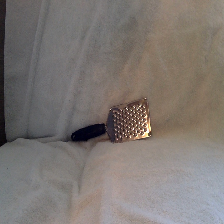

 
pair 7


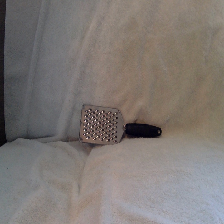

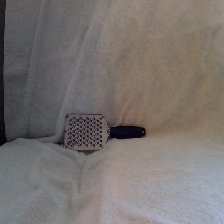

 
pair 8


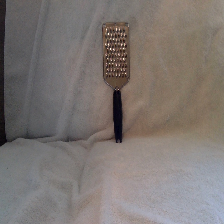

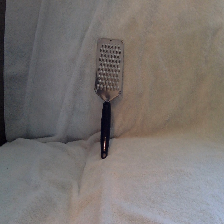

 
pair 9


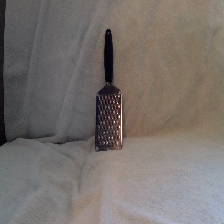

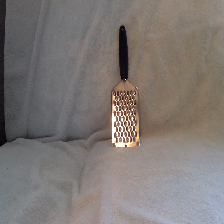

 
pair 15


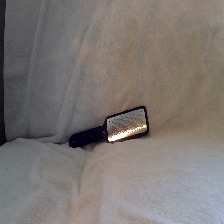

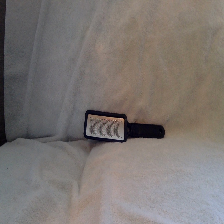

 
pair 16


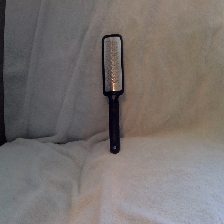

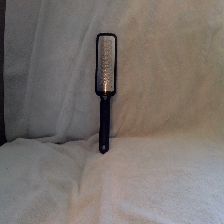

 
pair 17


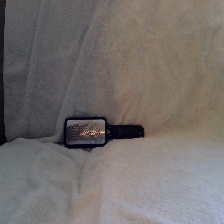

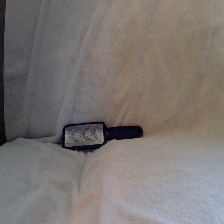

 
pair 18


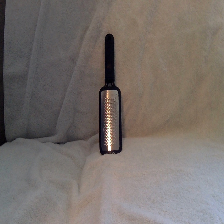

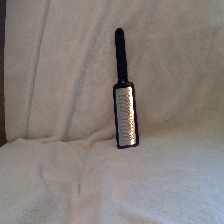

 
pair 19


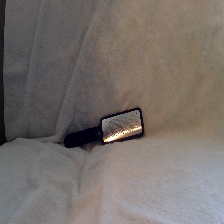

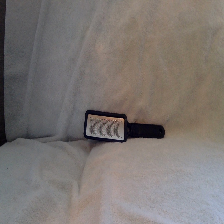

In [ ]:
train = [i for i in range(0,5)]+[i for i in range(10,15)]
test = [i for i in range(5,10)]+[i for i in range(15,20)]

for i in test:
  bestj = -1
  bestdist = 0
  for j in train:
    if i != j: 
#      dist = sum((dat[i] - dat[j])**2)
      dist = (dat[i] @ dat[j])**2 / ((dat[i] @ dat[i])*(dat[j] @ dat[j])) 
      if dist > bestdist: bestj, bestdist = j, dist
  print("pair {}".format(i))
  display(imgs[i])
  display(imgs[bestj])
#  print(i,bestj)
#  print(labs[i], labs[bestj])
  print(" ")